In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
from fdaf import *
import IPython.display as ipd

In [2]:
signal_microphone, signal_loudspeaker, impulse_response, rate = generate_signals()

In [3]:
N = 500

# finish_index = 4 * rate # stop after 4 seconds
# signal_error, estimated_impulse_response = NLMS(signal_loudspeaker, signal_microphone, N, 0.5, 0.000001, freeze_index=finish_index)
signal_error, estimated_impulse_response = NLMS(signal_loudspeaker, signal_microphone, N, 0.5, 0.000001)

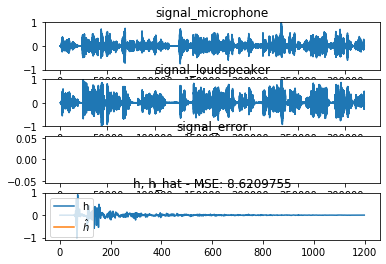

In [4]:
plot_signals(signal_microphone, signal_loudspeaker, impulse_response, signal_error, estimated_impulse_response, N)

In [88]:
# Loudspeaker signal
ipd.Audio(signal_loudspeaker.reshape(-1), rate=rate)

In [89]:
# Microphone signal
ipd.Audio(signal_microphone.reshape(-1), rate=rate)

In [7]:
# Filtered signal
#ipd.Audio(signal_error.reshape(-1), rate=rate)

## Test BFDF

In [93]:
x = get_shifted_blocks(signal_loudspeaker,1024,512)
h = get_shifted_blocks(impulse_response,1024,512)
X = fft.fft(x)
H = fft.fft(h)
y = BFDF(X,H,512)
print(X.shape,H.shape,y.shape)
ipd.Audio(y.T,rate=rate)

(626, 1024) (4, 1024) (320512, 1)


## Test FDAF_OS

Fix N to be power of 2: 1024
Fix N to be power of 2: 512
146730110.0


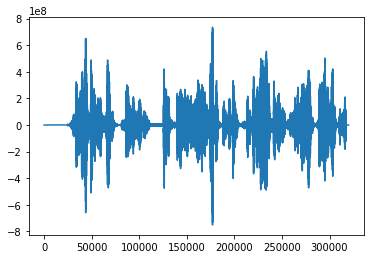

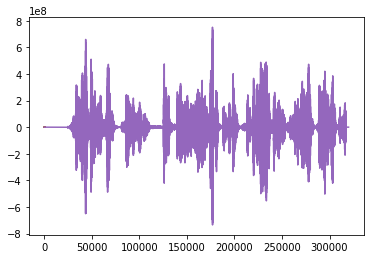

In [92]:
fi = np.asarray([[2,20]])*rate

e,y,H,p = FDAF_OS(signal_loudspeaker,signal_microphone, freeze_index=fi)

plt.plot(e.ravel())
print(e.ravel()[int(1e5)])
plt.figure()
plt.plot(p.T)
plt.plot(y)
ipd.Audio(y.ravel(),rate=rate)